In [ ]:
import matplotlib.pyplot as plt
import os
from scipy import signal
from scipy.io import wavfile
import numpy as np
from librosa import display
import librosa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Recordings retrieval

In [ ]:
# Dictionnary of codes/species
codes = {'BD15F':'Atlantic Spotted Dolphin','CC2A':'Bearded Seal','BB1A' : 'Beluga, White Whale','BD19D' : 'Bottlenose Dolphin','AA1A' : 'Bowhead Whale','BD15B' : 'Clymene Dolphin','BD3B' : 'Common Dolphin','BE9A' : 'False Killer Whale', 'BD5A' : 'Fraser\'s Dolphin','BD4A' : 'Grampus, Rissu\'s Dolphin','CC12G' : 'Harp Seal','AC2A' : 'Humpback Whale','BE7A' : 'Killer Whale','CC4A' : 'Leopard Seal', 'BE3C' : 'Long Finned Pilot Whale','BD10A' : 'Melon Headed Whale' ,'AC1A' : 'Minke Whale','BB2A' : 'Narwhal','AA3A': 'Northern Right Whale','BD15A' : 'Pantropical Spotted Dolphin','CC14A' : 'Ross Seal','BD17A' : 'Rough-Toothed Dolphin','BE3D' : 'Short-Finned (Pacific) Pilot Whale','AA3B' : 'Southern Right Whale','BA2A' : 'Sperm Whale','BD15L' : 'Spinner Dolphin','BD15C' : 'Striped Dolphin','CB1A' : 'Walrus','CC5A' : 'Weddell Seal','BD6B' : 'White-beaked Dolphin','BD6A' : 'White-sided Dolphin'}

31

In [ ]:
# Retrieve sounds recordings from the internet
for code in codes:
  url = f"https://whoicf2.whoi.edu/science/B/whalesounds/bestOf.cfm?code={code}"
  !wget -A wav -m -nd -p -E -k -K -np -P /content/drive/MyDrive/recordings/$code $url

In [ ]:
True==1

True

In [ ]:
# Keep recordings of time lenght (secs) > 3 and < 6
for code in os.listdir("/content/drive/MyDrive/recordings/"):
  directory = f"/content/drive/MyDrive/recordings/{code}/"
  for file in os.listdir(directory):
    file_path = directory+file
    try:
      sample_rate, samples = wavfile.read(file_path)
      time_lenght = len(samples)/sample_rate
      if time_lenght < 3 or time_lenght > 6:
        os.remove(file_path)
    except: # Delete the file if it is corrupted
      os.remove(file_path)
  try: # Remove empty code folders
    os.rmdir(directory) 
    del codes[code]
  except:
    continue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 14467072 bytes, expected 30599842 bytes from header.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 1081344 bytes, expected 5651510 bytes from header.
  import sys


In [ ]:
# Download recordings (je crois qu'on peut se débarasser de cette bulle)
!zip -r /content/recordings.zip /content/recordings
from google.colab import files
files.download("/content/recordings.zip")

# Spectrograms generator

(array([ 3.,  5.,  7., 18., 13., 20., 28., 43., 51., 32.]), array([-32768. , -29526.4, -26284.8, -23043.2, -19801.6, -16560. ,
       -13318.4, -10076.8,  -6835.2,  -3593.6,   -352. ]), <a list of 10 Patch objects>)
(array([32., 57., 43., 24., 18., 17., 16.,  9.,  2.,  2.]), array([  432. ,  3659.2,  6886.4, 10113.6, 13340.8, 16568. , 19795.2,
       23022.4, 26249.6, 29476.8, 32704. ]), <a list of 10 Patch objects>)
5000
166600
38009.454545454544
21900.0
-32768
32704


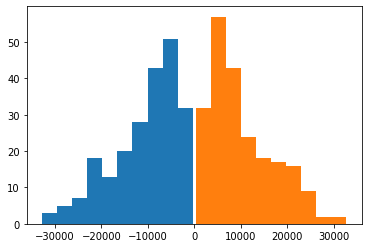

In [ ]:
# Analyze recordings
rates = []
freq_min=[]
freq_max=[]
max_frequency = 0
min_frequency = 100000000000
for code in codes:
  try:
    for file in os.listdir(f"/content/drive/MyDrive/recordings/{code}"):
      file_path = f"/content/drive/MyDrive/recordings/{code}/"+file
      sample_rate, samples = wavfile.read(file_path)
      current_min = np.min(samples)
      current_max = np.max(samples)
      if current_min < min_frequency:
        min_frequency = current_min
      if current_max > max_frequency:
        max_frequency = current_max
      freq_min.append(current_min)
      freq_max.append(current_max)
      rates.append(sample_rate)
      if len(samples.shape)!=1: # check if recording is mono
        print(code)
  except:
    continue
print(plt.hist(freq_min))
print(plt.hist(freq_max))
print(np.min(rates))
print(np.max(rates))
print(np.mean(rates))
print(np.median(rates))
print(min_frequency)
print(max_frequency)

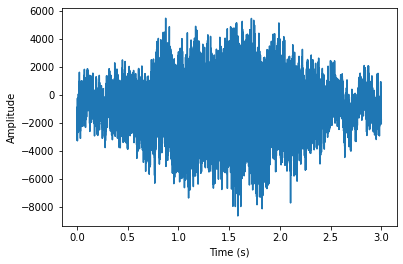

time lenght = 3.2066


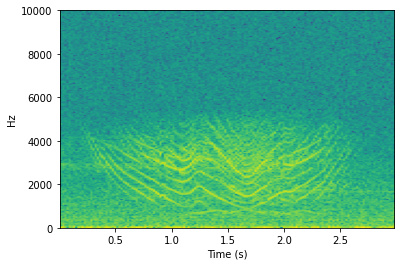

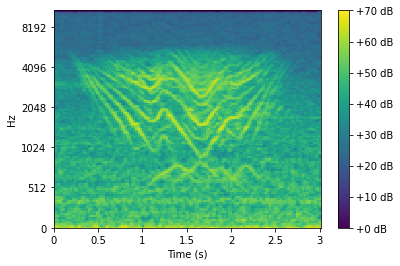

In [ ]:
# Check to see if spectrogram can be produced from a file

# waveform
sample_rate, samples = wavfile.read('/content/drive/MyDrive/recordings/CC14A/6608900B.wav')
samples = samples[:3*sample_rate] # keep first 3 secs only
time = np.linspace(0, len(samples) / sample_rate, len(samples))
plt.figure(1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(time, samples)
plt.show()

# scipy spectrogram
sample_rate, samples = wavfile.read('/content/drive/MyDrive/recordings/CC14A/6608900B.wav')
print('time lenght =',len(samples)/sample_rate)
samples = samples[:3*sample_rate] # keep first 3 secs only
Pxx, freqs, bins, im = plt.specgram(samples,Fs=sample_rate,NFFT=512)
plt.xlabel('Time (s)')
plt.ylabel('Hz')
plt.show()

# librosa spectrogram using mel-scale for frequencies and decibel-scale for amplitudes
samples, sample_rate = librosa.load('/content/drive/MyDrive/recordings/CC14A/6608900B.wav', duration=3, mono=True)
sgram = librosa.stft(samples) # raw spectrogram
sgram_mag, sgram_phase = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate, fmax=10000) # mel-scale
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min) # decibel-scale
librosa.display.specshow(mel_sgram, cmap='viridis', x_axis='s', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.show()
#plt.savefig('62018002.png', bbox_inches='tight', pad_inches=0) # test saving image


In [ ]:
#on peut se débarasser de cette bulle aussi non?
img_dir = "/content/drive/MyDrive/images/"
os.mkdir(img_dir)
for code in codes:
    os.mkdir(f"/content/drive/MyDrive/images/{code}")

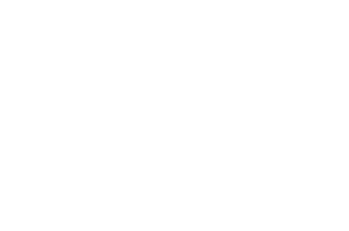

In [ ]:
# Generate spectrograms and save them
sgram_data_list=[]
labels = []
images = []
recordings = []
for code in os.listdir("/content/drive/MyDrive/recordings/"):
  directory = f"/content/drive/MyDrive/recordings/{code}/"
  try:
    for file in os.listdir(directory):
      samples, sample_rate = librosa.load(f"{directory}/{file}", sr=44100, duration=3, mono=True)
      sgram = librosa.stft(samples) # raw spectrogram
      sgram_mag, sgram_phase = librosa.magphase(sgram)
      mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate, fmin=10, fmax=14000) # mel-scale 
      mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min) # decibel-scale
      images.append(mel_sgram)
      sgram_data_list.append(mel_sgram.flatten())
      labels.append(code)
      recordings.append(file) 
      plt.axis('off')
      #plt.savefig(f"/content/drive/MyDrive/images/{code}/{file[:-4]}.png", bbox_inches='tight', pad_inches=0)
  except:
    continue


In [ ]:
np.save('/content/drive/MyDrive/dataset.npy',sgram_data_list)
np.save('/content/drive/MyDrive/labels.npy',labels)
np.save('/content/drive/MyDrive/images.npy',images)

In [ ]:
from sklearn.decomposition import PCA as pca
from sklearn.manifold import TSNE as tsne
import pandas as pd
from sklearn.manifold import Isomap as isomap

data_simply_pca=pca(n_components=2).fit_transform(sgram_data_list)
df_subset_pca = pd.DataFrame(data_simply_pca, columns=['pca-2d-one','pca-2d-two'])
data_pca=pca(n_components=50).fit_transform(sgram_data_list)
data_tsne=tsne(n_components=2).fit_transform(data_pca)
df_subset = pd.DataFrame(data_tsne, columns=['tsne-2d-one','tsne-2d-two'])
data_isomap = isomap().fit_transform(data_pca)
df_subset_isomap = pd.DataFrame(data_isomap, columns=['isomap-2d-one','isomap-2d-two'])

In [ ]:
nb_labels = len(np.unique(labels))
codes = {'BD15F':'Atlantic Spotted Dolphin','CC2A':'Bearded Seal','BB1A' : 'Beluga, White Whale','BD19D' : 'Bottlenose Dolphin','AA1A' : 'Bowhead Whale','BD15B' : 'Clymene Dolphin','BD3B' : 'Common Dolphin','BE9A' : 'False Killer Whale', 'BD5A' : 'Fraser\'s Dolphin','BD4A' : 'Grampus, Rissu\'s Dolphin','CC12G' : 'Harp Seal','AC2A' : 'Humpback Whale','BE7A' : 'Killer Whale','CC4A' : 'Leopard Seal', 'BE3C' : 'Long Finned Pilot Whale','BD10A' : 'Melon Headed Whale' ,'AC1A' : 'Minke Whale','BB2A' : 'Narwhal','AA3A': 'Northern Right Whale','BD15A' : 'Pantropical Spotted Dolphin','CC14A' : 'Ross Seal','BD17A' : 'Rough-Toothed Dolphin','BE3D' : 'Short-Finned (Pacific) Pilot Whale','AA3B' : 'Southern Right Whale','BA2A' : 'Sperm Whale','BD15L' : 'Spinner Dolphin','BD15C' : 'Striped Dolphin','CB1A' : 'Walrus','CC5A' : 'Weddell Seal','BD6B' : 'White-beaked Dolphin','BD6A' : 'White-sided Dolphin'}
u_labels = np.unique(labels)
for code in codes.copy():
  if code not in u_labels:
    del codes[code]
species = [codes[label] for label in labels]

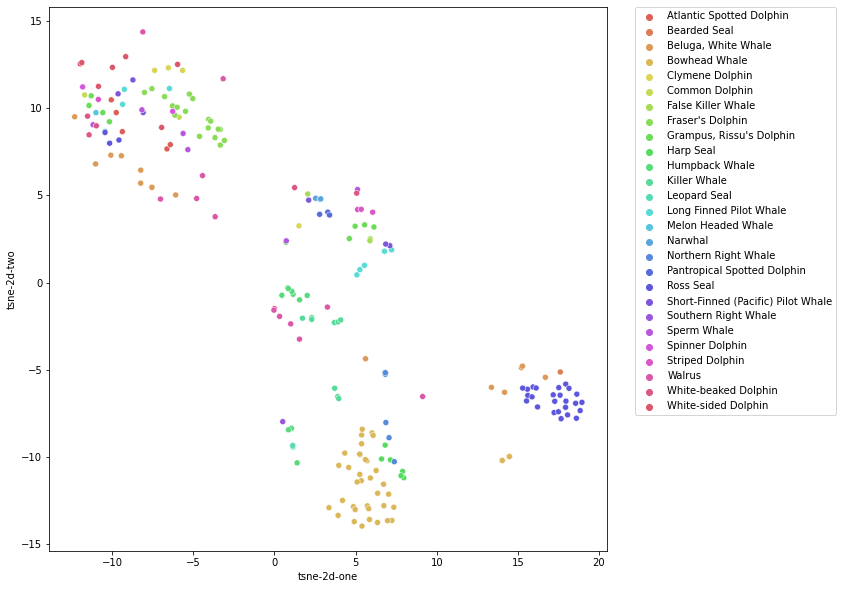

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=species,
    palette=sns.color_palette("hls", nb_labels),
    data=df_subset,
    legend="full",
    alpha=1
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

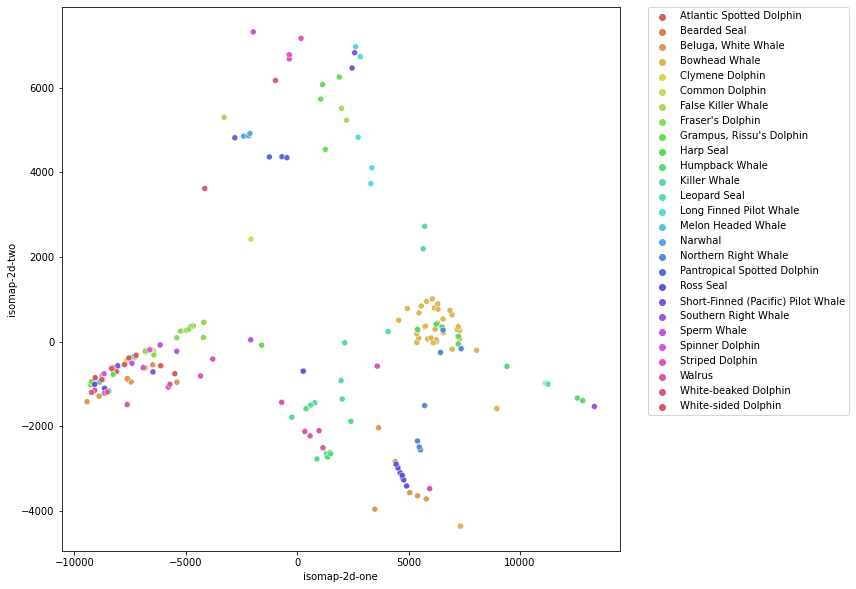

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="isomap-2d-one", y="isomap-2d-two",
    hue=species,
    palette=sns.color_palette("hls", nb_labels),
    data=df_subset_isomap,
    legend="full",
    alpha=1
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

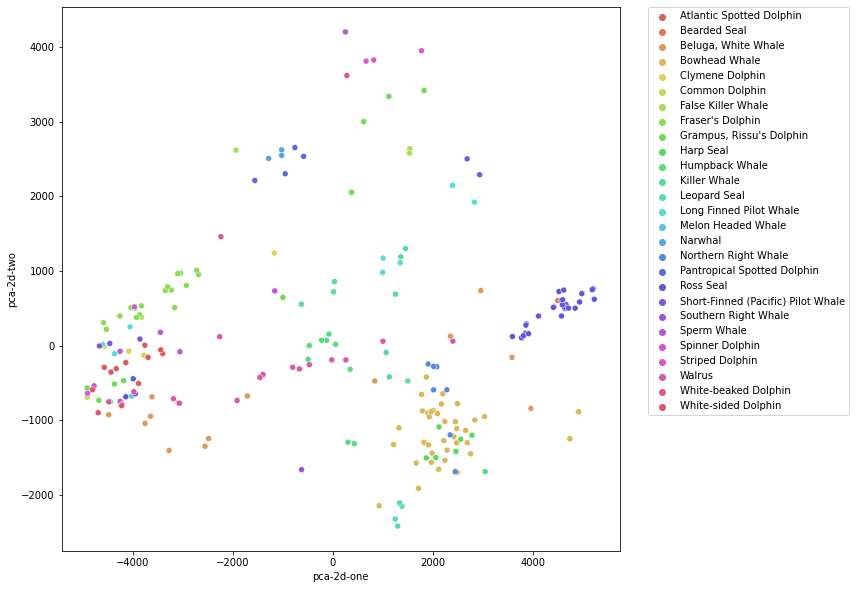

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue=species,
    palette=sns.color_palette("hls", nb_labels),
    data=df_subset_pca,
    legend="full",
    alpha=1
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
!pip3 install rasterfairy-py3

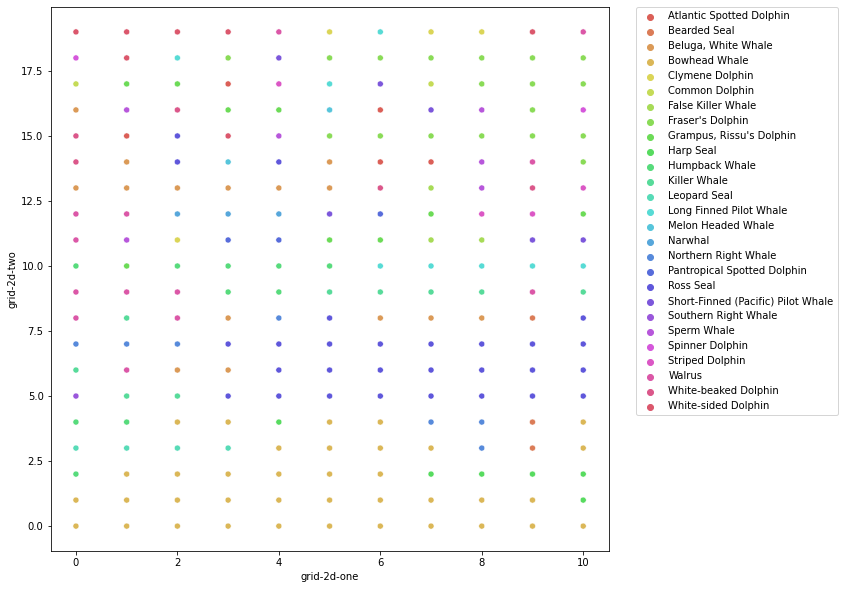

In [ ]:
import rasterfairy
grid, (width,height) = rasterfairy.transformPointCloud2D(data_tsne)
df_grid = pd.DataFrame(grid, columns=['grid-2d-one','grid-2d-two'])
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="grid-2d-one", y="grid-2d-two",
    hue=species,
    palette=sns.color_palette("hls", nb_labels),
    data=df_grid,
    legend="full",
    alpha=1
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
array_images = [None]*(len(images))
array_labels = [None]*(len(labels))
array_recordings = [None]*(len(recordings))

for i in range(len(grid)):
  pos = int(width*grid[i][1]+grid[i][0])
  print(grid[i],pos)
  array_images[pos] = images[i]
  array_labels[pos] = labels[i]
  array_recordings[pos] = recordings[i]

[ 6. 16.] 182
[ 3. 17.] 190
[ 6. 14.] 160
[ 1. 15.] 166
[ 7. 14.] 161
[9. 8.] 97
[9. 4.] 53
[9. 3.] 42
[ 5. 13.] 148
[ 5. 14.] 159
[ 2. 13.] 145
[ 0. 13.] 143
[ 1. 14.] 155
[3. 8.] 91
[6. 8.] 94
[3. 6.] 69
[8. 8.] 96
[2. 6.] 68
[ 3. 13.] 146
[ 4. 13.] 147
[ 1. 13.] 144
[7. 8.] 95
[ 0. 16.] 176
[8. 1.] 19
[1. 2.] 23
[6. 0.] 6
[7. 1.] 18
[2. 0.] 2
[2. 4.] 46
[3. 4.] 47
[4. 3.] 37
[5. 1.] 16
[2. 1.] 13
[4. 0.] 4
[7. 0.] 7
[5. 3.] 38
[5. 0.] 5
[10.  0.] 10
[3. 2.] 25
[6. 1.] 17
[3. 1.] 14
[5. 4.] 49
[6. 3.] 39
[9. 1.] 20
[4. 2.] 26
[8. 0.] 8
[5. 2.] 27
[0. 1.] 11
[9. 0.] 9
[1. 1.] 12
[4. 1.] 15
[6. 4.] 50
[2. 2.] 24
[7. 3.] 40
[6. 2.] 28
[1. 0.] 1
[3. 0.] 3
[0. 0.] 0
[10.  4.] 54
[10.  3.] 43
[ 7. 19.] 216
[ 5. 19.] 214
[ 8. 19.] 217
[ 2. 11.] 123
[ 7. 17.] 194
[ 0. 17.] 187
[ 7. 11.] 128
[ 8. 11.] 129
[ 7. 13.] 150
[ 6. 18.] 204
[ 9. 16.] 185
[ 3. 18.] 201
[ 7. 18.] 205
[ 8. 18.] 206
[ 8. 17.] 195
[ 5. 15.] 170
[ 5. 18.] 203
[ 6. 15.] 171
[ 7. 15.] 172
[ 9. 18.] 207
[10. 14.] 164
[ 8. 15.

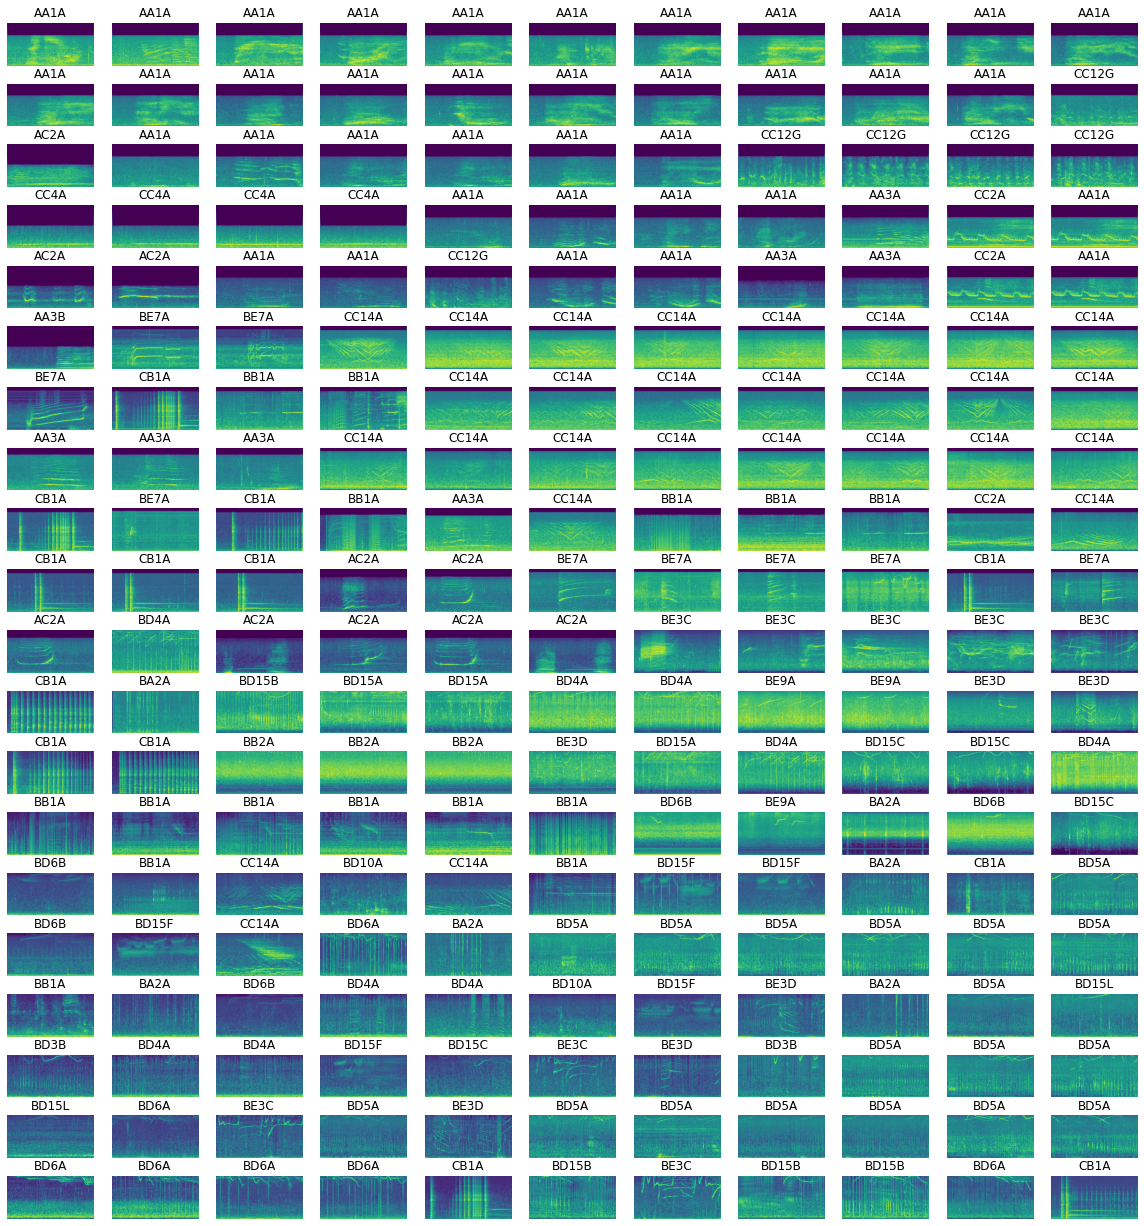

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(height*2, width*2))
image_grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(height, width),  # creates heigth x width grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for i, (ax, im) in enumerate(zip(image_grid, array_images)):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, origin='lower')
    ax.set_axis_off()
    ax.set_title(array_labels[i])

plt.axis('off')
plt.show()

In [ ]:
print(array_recordings[-5:-1])
print(array_labels[-5:-1])
for i in array_labels[-5:-1]:
  print(codes[i])

['7500502X.wav', '8300603C.wav', '8300602M.wav', '7500102H.wav']
['BE3C', 'BD15B', 'BD15B', 'BD6A']
Long Finned Pilot Whale
Clymene Dolphin
Clymene Dolphin
White-sided Dolphin


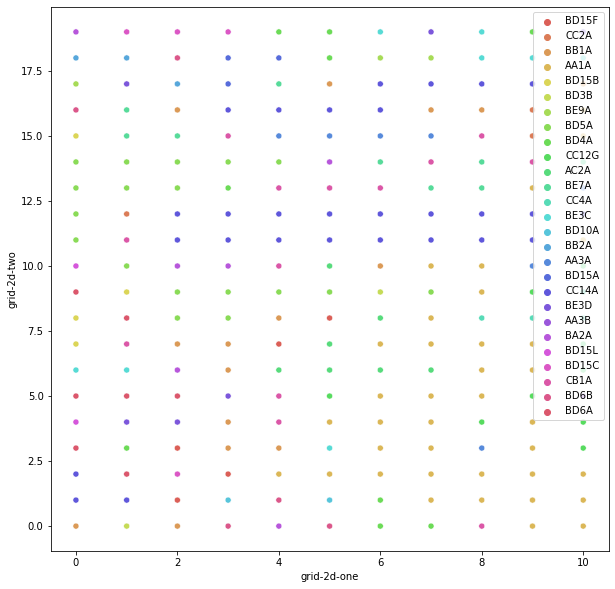

In [ ]:
import rasterfairy
grid_isomap, (width,height) = rasterfairy.transformPointCloud2D(data_isomap)
df_grid_isomap = pd.DataFrame(grid_isomap, columns=['grid-2d-one','grid-2d-two'])
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="grid-2d-one", y="grid-2d-two",
    hue=labels,
    palette=sns.color_palette("hls", nb_labels),
    data=df_grid_isomap,
    legend="full",
    alpha=1
)

In [ ]:
array_images_isomap = [None]*(len(images))
array_labels_isomap = [None]*(len(labels))
for i in range(len(grid_isomap)):
  pos = int(width*grid_isomap[i][1]+grid_isomap[i][0])
  print(grid_isomap[i],pos)
  array_images_isomap[pos] = images[i]
  array_labels_isomap[pos] = labels[i]

[3. 2.] 25
[2. 3.] 35
[5. 8.] 93
[2. 1.] 13
[4. 7.] 81
[ 1. 12.] 133
[ 9. 16.] 185
[ 9. 15.] 174
[3. 6.] 69
[4. 3.] 37
[4. 8.] 92
[2. 0.] 2
[3. 3.] 36
[ 6. 10.] 116
[ 7. 16.] 183
[ 5. 17.] 192
[10. 17.] 197
[ 2. 16.] 178
[2. 7.] 79
[3. 7.] 80
[3. 4.] 47
[ 8. 16.] 184
[0. 0.] 0
[8. 2.] 30
[6. 7.] 83
[10.  1.] 21
[9. 4.] 53
[4. 2.] 26
[10. 11.] 131
[ 9. 13.] 152
[7. 8.] 95
[10.  2.] 32
[6. 4.] 50
[7. 3.] 40
[7. 1.] 18
[8. 9.] 107
[5. 4.] 49
[10.  0.] 10
[9. 6.] 75
[9. 3.] 42
[6. 5.] 61
[ 7. 10.] 117
[7. 7.] 84
[9. 2.] 31
[8. 7.] 85
[9. 0.] 9
[8. 6.] 74
[9. 1.] 20
[8. 1.] 19
[7. 2.] 29
[7. 5.] 62
[ 8. 10.] 118
[7. 4.] 51
[9. 7.] 86
[8. 5.] 63
[6. 3.] 39
[6. 2.] 28
[5. 2.] 27
[10. 16.] 186
[10. 15.] 175
[0. 8.] 88
[0. 7.] 77
[1. 9.] 100
[ 0. 15.] 165
[6. 9.] 105
[1. 0.] 1
[ 6. 18.] 204
[ 7. 18.] 205
[ 0. 17.] 187
[3. 9.] 102
[7. 9.] 106
[3. 8.] 91
[5. 9.] 104
[ 1. 10.] 111
[ 0. 11.] 121
[ 0. 12.] 132
[2. 8.] 90
[ 2. 13.] 145
[ 2. 14.] 156
[4. 9.] 103
[ 4. 14.] 158
[ 3. 14.] 157
[2. 9.] 101

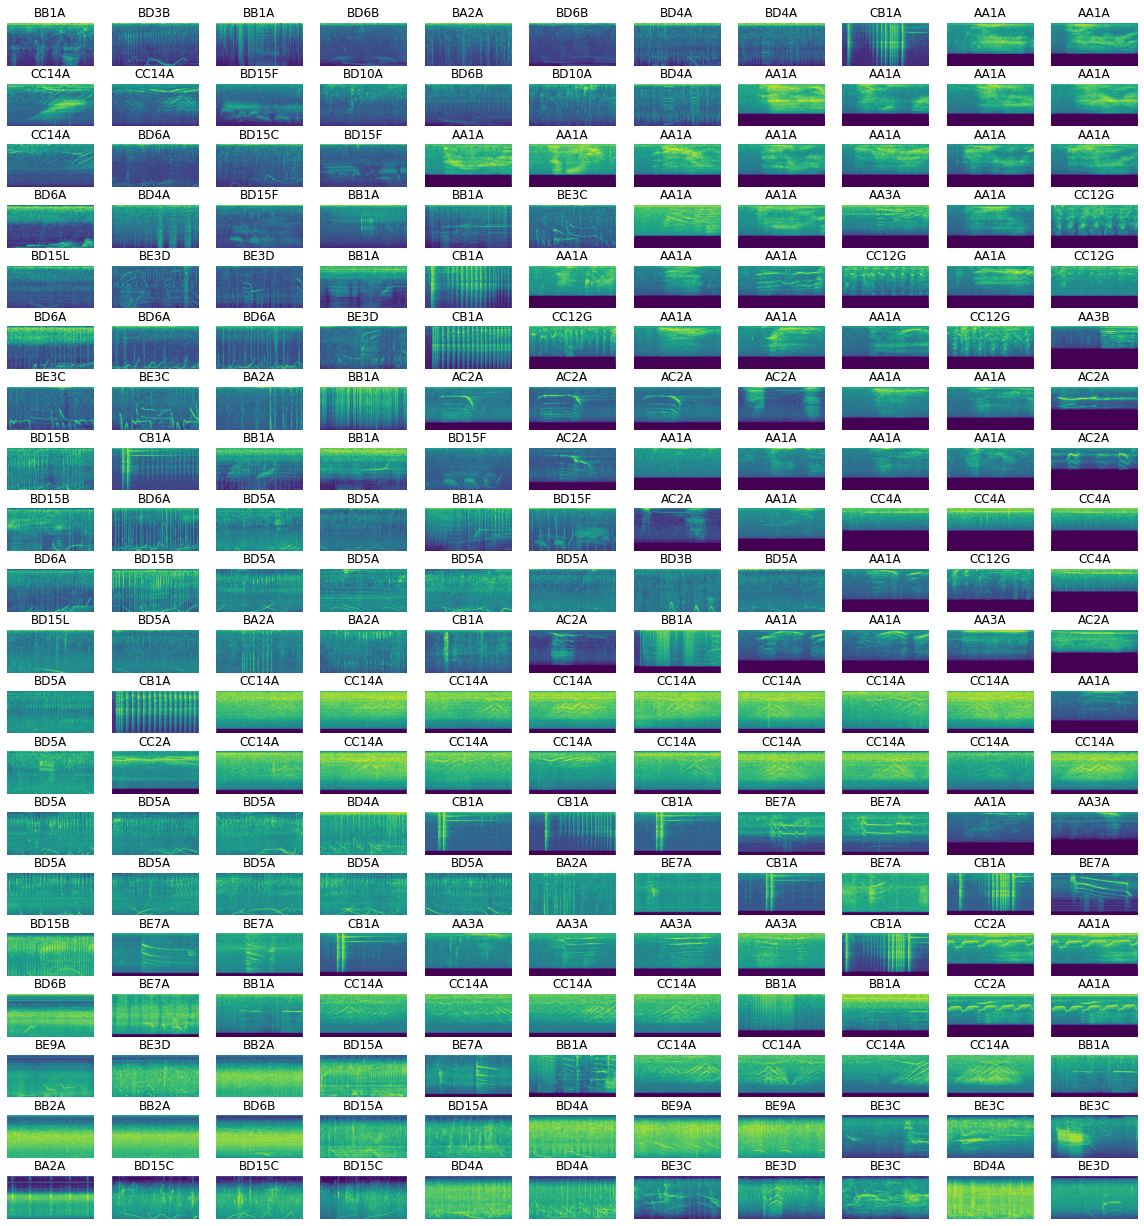

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(height*2, width*2))
image_grid_isomap = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(height, width),  # creates heigth x width grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for i, (ax, im) in enumerate(zip(image_grid_isomap, array_images_isomap)):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.set_axis_off()
    ax.set_title(array_labels_isomap[i])

plt.axis('off')
plt.show()

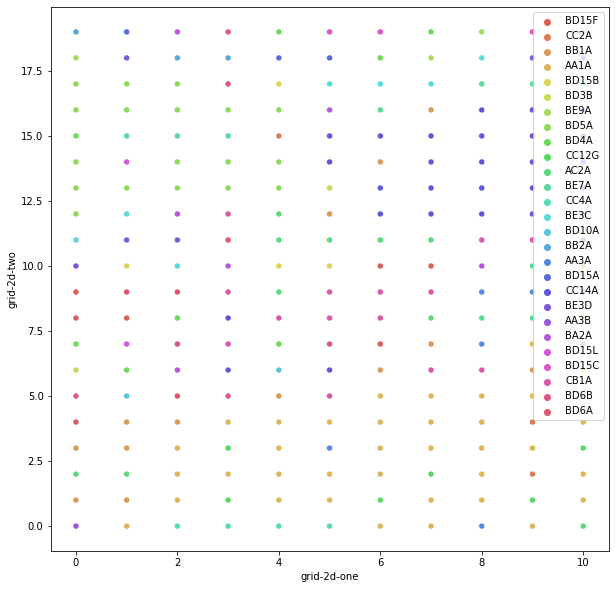

In [ ]:
import rasterfairy
grid_pca, (width,height) = rasterfairy.transformPointCloud2D(data_simply_pca)
df_grid_pca = pd.DataFrame(grid_pca, columns=['grid-2d-one','grid-2d-two'])
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="grid-2d-one", y="grid-2d-two",
    hue=labels,
    palette=sns.color_palette("hls", nb_labels),
    data=df_grid_pca,
    legend="full",
    alpha=1
)

In [ ]:
array_images_pca = [None]*(len(images))
array_labels_pca = [None]*(len(labels))
for i in range(len(grid_pca)):
  pos = int(width*grid_pca[i][1]+grid_pca[i][0])
  print(grid_pca[i],pos)
  array_images_pca[pos] = images[i]
  array_labels_pca[pos] = labels[i]

[1. 8.] 89
[0. 9.] 99
[ 7. 10.] 117
[6. 7.] 83
[ 6. 10.] 116
[ 4. 15.] 169
[9. 4.] 53
[9. 2.] 31
[4. 5.] 59
[9. 6.] 75
[0. 3.] 33
[6. 6.] 72
[2. 4.] 46
[7. 7.] 84
[10. 10.] 120
[ 6. 14.] 160
[ 5. 12.] 137
[ 7. 16.] 183
[0. 1.] 11
[1. 3.] 34
[1. 1.] 12
[10.  5.] 65
[1. 4.] 45
[7. 1.] 18
[2. 3.] 35
[10.  1.] 21
[8. 2.] 30
[4. 1.] 15
[4. 3.] 37
[10.  6.] 76
[6. 3.] 39
[6. 2.] 28
[9. 0.] 9
[10.  8.] 98
[2. 2.] 24
[4. 2.] 26
[7. 5.] 62
[5. 4.] 49
[8. 4.] 52
[2. 1.] 13
[8. 5.] 63
[9. 3.] 42
[1. 0.] 1
[5. 2.] 27
[3. 2.] 25
[9. 5.] 64
[8. 1.] 19
[3. 4.] 47
[9. 7.] 86
[5. 1.] 16
[7. 3.] 40
[7. 0.] 7
[8. 3.] 41
[4. 4.] 48
[6. 5.] 61
[6. 4.] 50
[6. 0.] 6
[7. 4.] 51
[10.  4.] 54
[10.  2.] 32
[ 5. 10.] 115
[ 1. 10.] 111
[ 4. 10.] 114
[ 4. 17.] 191
[ 5. 13.] 148
[0. 6.] 66
[ 8. 19.] 217
[ 7. 18.] 205
[ 0. 18.] 198
[ 1. 13.] 144
[ 4. 13.] 147
[ 0. 12.] 132
[ 0. 14.] 154
[ 2. 14.] 156
[ 3. 14.] 157
[ 4. 14.] 158
[ 0. 13.] 143
[ 2. 16.] 178
[ 3. 16.] 179
[ 3. 13.] 146
[ 4. 16.] 180
[ 2. 17.] 189
[ 2. 1

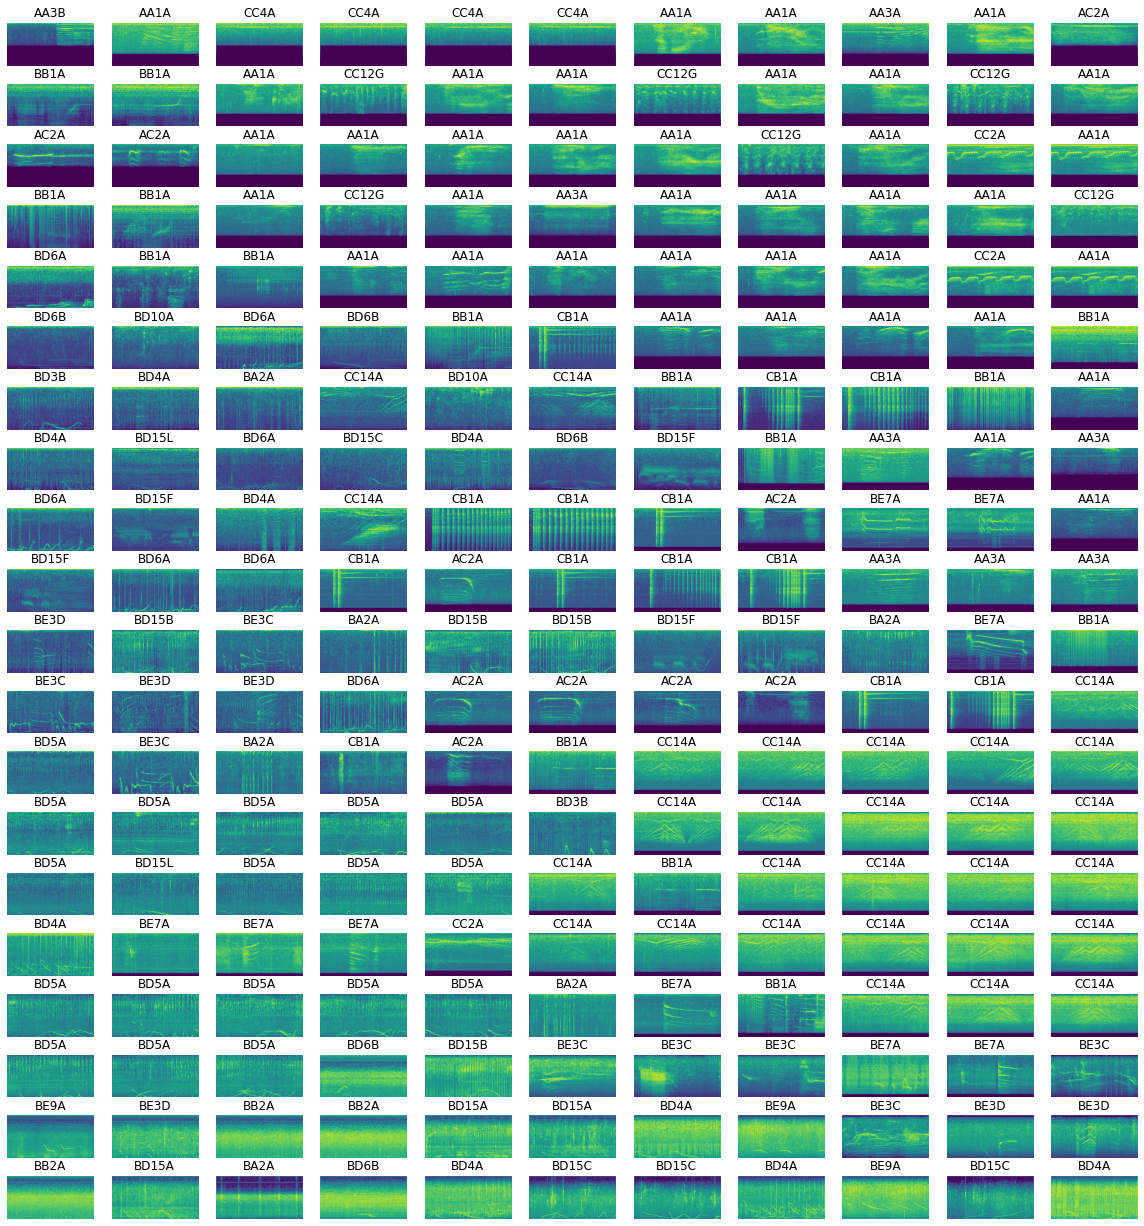

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(height*2, width*2))
image_grid_pca = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(height, width),  # creates heigth x width grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for i, (ax, im) in enumerate(zip(image_grid_pca, array_images_pca)):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.set_axis_off()
    ax.set_title(array_labels_pca[i])

plt.axis('off')
plt.show()